In [ ]:
from google.colab import files

In [ ]:
uploaded=files.upload()

Saving abalone.csv to abalone.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale


In [ ]:
dataset=pd.read_csv("/content/abalone.csv")

In [ ]:
dataset

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [ ]:
dataset.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

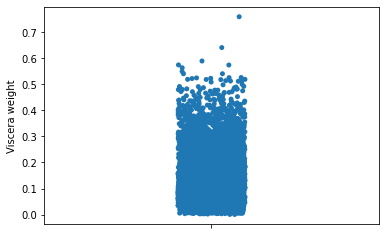

In [ ]:
sns.stripplot(y=dataset['Viscera weight'])

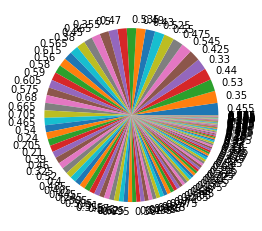

In [ ]:
plt.pie(dataset["Length"].value_counts(),labels=dataset["Length"].unique())
plt.show()

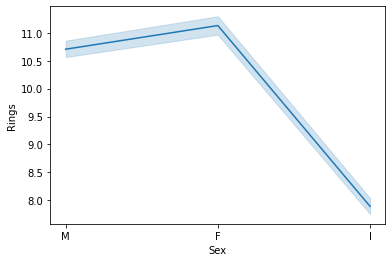

In [ ]:
#Bi-Variate Analysis
sns.lineplot(x=dataset.Sex,y=dataset.Rings)

<BarContainer object of 4177 artists>

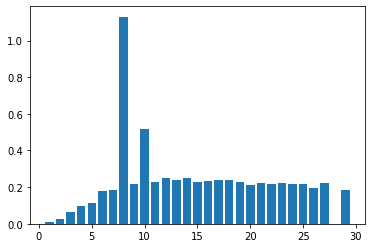

In [ ]:
plt.bar(dataset.Rings,dataset.Height)

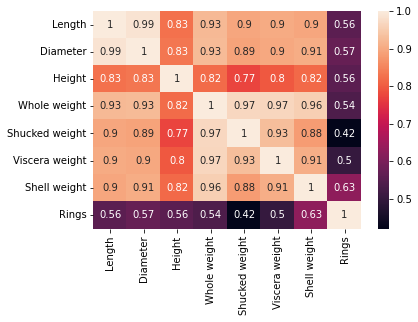

In [ ]:
#Multi-Variate Analysis
sns.heatmap(dataset.corr(),annot=True)

In [ ]:
#Perform descriptive statistics on the dataset
dataset.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [ ]:
dataset.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

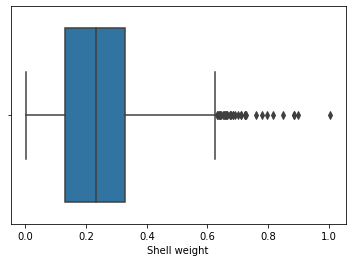

In [ ]:
sns.boxplot(x=dataset["Shell weight"])

In [ ]:
dataset.median()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Length            0.5450
Diameter          0.4250
Height            0.1400
Whole weight      0.7995
Shucked weight    0.3360
Viscera weight    0.1710
Shell weight      0.2340
Rings             9.0000
dtype: float64

In [ ]:
q1=dataset.Diameter.quantile(0.25)
q2=dataset.Diameter.quantile(0.75)
IQR = q2-q1
upper_limit = q2+1.5*IQR
lower_limit = q2-1.5*IQR
print(upper_limit)
print(lower_limit)
dataset["Diameter"].head()

0.675
0.285


0    0.365
1    0.265
2    0.420
3    0.365
4    0.255
Name: Diameter, dtype: float64

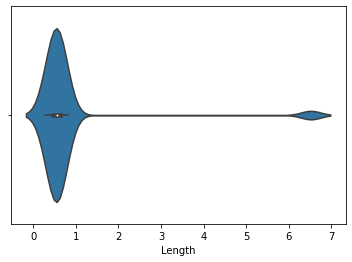

In [ ]:
dataset["Length"]=np.where(dataset["Length"]<lower_limit,6.52,dataset["Length"])
sns.violinplot(x=dataset["Length"])

In [ ]:
dataset.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
le=LabelEncoder()
dataset.Length=le.fit_transform(dataset.Length)
dataset.Sex=le.fit_transform(dataset.Sex)

In [ ]:
#Split the data into dependent and independent variables
y=dataset["Rings"]
x=dataset.drop("Rings",axis=1)

In [ ]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,34,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,2,13,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,0,49,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,2,31,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,1,9,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,0,56,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,2,61,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,2,63,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,0,68,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
#Scale the independent variables
scaled_x=pd.DataFrame(scale(x),columns=x.columns)
scaled_x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.810336,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217
1,1.151980,-1.724528,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987
2,-1.280690,-0.157342,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139
3,1.151980,-0.940935,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294
4,-0.064355,-1.898660,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757
...,...,...,...,...,...,...,...,...
4172,-1.280690,0.147389,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062
4173,1.151980,0.365054,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685
4174,1.151980,0.452120,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955
4175,-1.280690,0.669784,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739


In [ ]:
#Split the data into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(scaled_x,y,test_size=0.3,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(2923, 8) (1254, 8) (2923,) (1254,)


In [ ]:
#Build the Model
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model = linear_model.LinearRegression()
model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
#Train the Model
Y_pred_train = model.predict(xtrain)

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(ytrain, Y_pred_train))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(ytrain, Y_pred_train))

Coefficients: [ 0.06590832 -0.30580607  1.08303311  0.30271851  4.67819471 -4.47827698
 -1.00860584  1.39614181]
Intercept: 9.914121012485445
Mean squared error (MSE): 4.78
Coefficient of determination (R^2): 0.54


In [ ]:
#Test the Model
Y_pred_test = model.predict(xtest)

In [ ]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(ytest, Y_pred_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(ytest, Y_pred_test))

Coefficients: [ 0.06590832 -0.30580607  1.08303311  0.30271851  4.67819471 -4.47827698
 -1.00860584  1.39614181]
Intercept: 9.914121012485445
Mean squared error (MSE): 5.09
Coefficient of determination (R^2): 0.52
